<a href="https://colab.research.google.com/github/Shatha-1/IT326-Project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Report

# [1] Problem

Depression has become one of the most common challenges facing students today.
Many suffer from academic pressure, lack of sleep, financial stress, or personal issues that may negatively affect their mental health.
However, it is not always clear which factors play the biggest role in increasing the risk of depression.
This project addresses the problem of identifying and understanding the key factors that could lead students to experience depression.

# [2] Data Mining Task



*  Classification: In the classification task, the Depression column serves as the target variable (Label), while the remaining columns are considered features used to build a model that predicts whether a student is experiencing depression or not.
*   Clustering: Based on attributes such as age, academic pressure, study satisfaction, sleep duration, dietary habits, study hours, and financial stress, to discover hidden patterns among students without relying on predefined labels.



# [3] Data

Name: Depression Student Dataset

Host: Kaggle


Number of objects (rows): 108

Number of attributes (columns): 11

Class Attribute: Depression

In [3]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("ikynahidwin/depression-student-dataset")

print("Path to dataset files:", path)
print("Files in the downloaded directory:", os.listdir(path))

dataset_path = os.path.join(path, 'Depression Student Dataset.csv')

try:
    data = pd.read_csv(dataset_path)
    print("Dataset loaded successfully.")
    print("\nDataset shape:", data.shape)
    print("\nSample of the dataset:")
    display(data.head())
except FileNotFoundError:
    print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")

100%|██████████| 4.25k/4.25k [00:00<00:00, 7.48MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ikynahidwin/depression-student-dataset/versions/1
Files in the downloaded directory: ['Depression Student Dataset.csv']
Dataset loaded successfully.

Dataset shape: (502, 11)

Sample of the dataset:


,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


The dataset used in this project is called “Depression Student Dataset”. It contains information about students’ academic, personal, and environmental factors that may influence their mental health and depression levels.

The attributes and their possible values are as follows:

Gender: Male, Female

Age: Numeric values ranging from 18 to 34

Sleep Duration: Less than 5 hours, 5–6 hours, 6–8 hours, More than 8 hours

Dietary Habits: Healthy, Moderate, Unhealthy

Academic Pressure: Integer values from 1 to 5 representing pressure level

Study Satisfaction: Integer values from 1 to 5 representing satisfaction level

Study Hours: Numeric values approximately between 1 and 14 hours per day

Financial Stress: Integer values from 1 to 5 representing stress level

Family History of Mental Illness: Yes, No

Have you ever had suicidal thoughts?: Yes, No

Depression (Target Label): Yes (Depressed), No (Not Depressed)

In [4]:
# Step 0: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
print("Step 1: Importing the dataset...")
dataset_path = "Depression Student Dataset.csv"

def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please ensure the file is uploaded to your Colab environment.")
        print("You can upload the file by clicking the folder icon on the left sidebar, then the upload icon, and selecting the file.")
        return None
df = load_dataset()

Step 1: Importing the dataset...
Dataset loaded successfully.


In [5]:
if df is not None:
    # Step 2: Dataset Overview
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("Column names:", df.columns.tolist())
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values Before Handling:")
    print(df.isnull().sum())

Rows: 502, Columns: 11
Column names: ['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Data Types:
Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

Missing Values Before Handling:
Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisf

The dataset contains 502 rows and 11 columns, representing information about students and various factors related to depression. All columns have no missing values, which means the dataset is clean and ready for analysis. The attributes include both demographic and behavioral information such as:

Gender, Age, and Sleep Duration (personal attributes)

Academic Pressure, Study Satisfaction, and Study Hours (academic-related factors)

Financial Stress and Family History of Mental Illness (environmental and familial factors)

Depression (target label indicating whether a student is depressed or not)

# Five-Number Summary Results:

In [6]:
# Step 3: Numeric Analysis (Five-number summary, Boxplots, Outliers)

# Identify numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric features detected:", numeric_features)

# Five-number summary
print("\nFive-number summary for each numeric feature:")
five_num_summary = df[numeric_features].describe(percentiles=[0.25, 0.5, 0.75])
five_num_summary = five_num_summary.loc[['min','25%','50%','75%','max']]
print(five_num_summary)

Numeric features detected: ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

Five-number summary for each numeric feature:
      Age  Academic Pressure  Study Satisfaction  Study Hours  \
min  18.0                1.0                 1.0          0.0   
25%  22.0                2.0                 2.0          3.0   
50%  26.5                3.0                 3.0          7.0   
75%  30.0                4.0                 4.0         10.0   
max  34.0                5.0                 5.0         12.0   

     Financial Stress  
min               1.0  
25%               2.0  
50%               3.0  
75%               4.0  
max               5.0  


In this step, a statistical summary was generated for the truly numeric attributes in the dataset. Although the code detected all columns as numeric because they are stored as numbers, only two columns are genuinely numerical: Age and Study Hours.

Other features such as Academic Pressure, Study Satisfaction, and Financial Stress use numeric scales (1–5) to represent levels or categories — these are ordinal categorical variables, not continuous numeric data.

The five-number summary (minimum, first quartile (25%), median (50%), third quartile (75%), and maximum) was used to describe the range and distribution of the numeric columns. For instance:

Age values range from 18 to 34, representing the actual numeric variation among students.

Study Hours range from 0 to 12, showing differences in daily study duration.

In conclusion, while many columns appear numeric, only Age and Study Hours are considered true numeric features suitable for numerical statistical analysis.

In [7]:
# Automatically detect numeric features while excluding binary/categorical ones
numeric_features = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if df[col].nunique() > 5  # ignore columns that have few unique values (categorical)
]

print("Numeric features detected:", numeric_features)

# ---- Five-number summary ----
print("\nFive-number summary for each numeric feature:")
five_num_summary = df[numeric_features].describe(percentiles=[0.25, 0.5, 0.75]).T[['min', '25%', '50%', '75%', 'max']]
print(five_num_summary)

Numeric features detected: ['Age', 'Study Hours']

Five-number summary for each numeric feature:
              min   25%   50%   75%   max
Age          18.0  22.0  26.5  30.0  34.0
Study Hours   0.0   3.0   7.0  10.0  12.0


Note: An additional code block was added to automatically detect and display only the truly numeric attributes. This helps exclude categorical or ordinal columns that are encoded as numbers, ensuring that only continuous numeric features (such as Age and Study Hours) are included in the statistical summary

# Box plots:

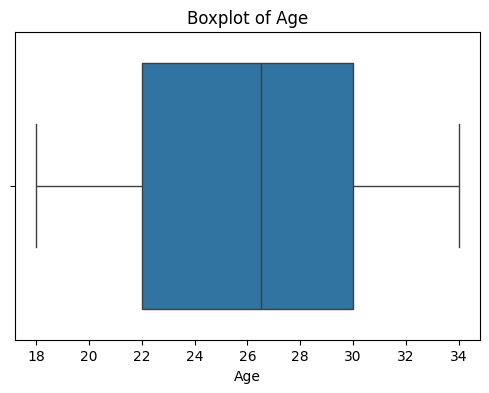

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

The boxplot shows that the Age values are fairly balanced, with most data points clustered around the median. This indicates that the participants are generally close in age, with no extreme variations observed

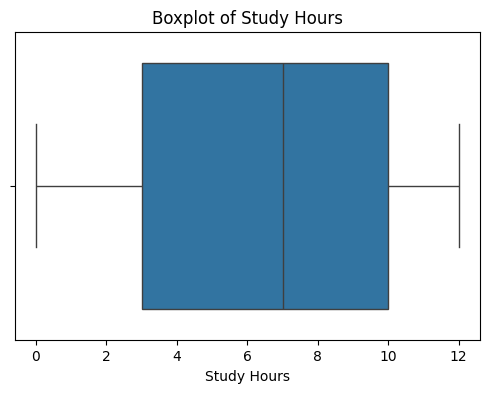

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Study Hours'])
plt.title('Boxplot of Study Hours')
plt.show()

The boxplot for Study Hours demonstrates a relatively even distribution, suggesting that most students study a similar number of hours. There are no significant differences or extreme study durations among participants.



# Outlier Detection Analysis

In [10]:
# ---- Outlier detection using IQR ----
outliers = {}
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values
    print(f"\nColumn: {col}")
    if outlier_values.empty:
        print("  No outliers detected.")
    else:
        print(f"  Number of outliers: {len(outlier_values)}")
        print("  Example values:", outlier_values.head().tolist())


Column: Age
  No outliers detected.

Column: Study Hours
  No outliers detected.


No outliers were detected for either Age or Study Hours, indicating that all data points fall within a reasonable and consistent range.

# Histograms

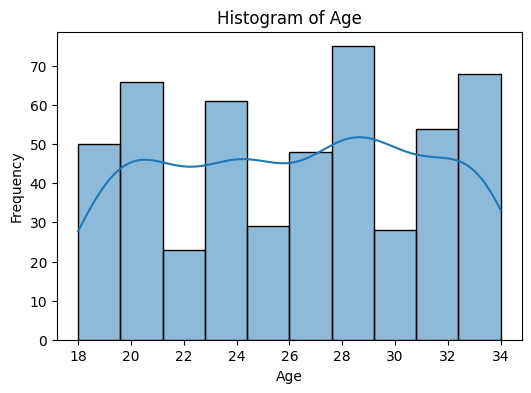

In [11]:
# Histogram for Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Analysis (Age):

The students are distributed between ages 18 and 34, with peaks around 20–21, 28–29, and 32–33.

The data shows a relatively balanced spread but with some noticeable clusters at specific ages.

This indicates that the dataset mainly represents young adults and does not require major cleaning for the Age attribute.

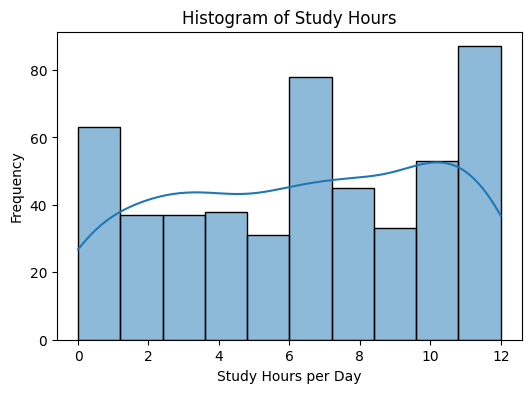

In [12]:
# Histogram for Study Hours
plt.figure(figsize=(6,4))
sns.histplot(df['Study Hours'], bins=10, kde=True)
plt.title('Histogram of Study Hours')
plt.xlabel('Study Hours per Day')
plt.ylabel('Frequency')
plt.show()

Analysis (Study Hours):

Most students study between 0 and 12 hours daily.

There are clear peaks at 0 hours (students not studying) and at 10–12 hours (students studying excessively).

This suggests the presence of potential outliers or unusual data points at the extremes.

# **هنا تعديل ❌**

# Scatterplots

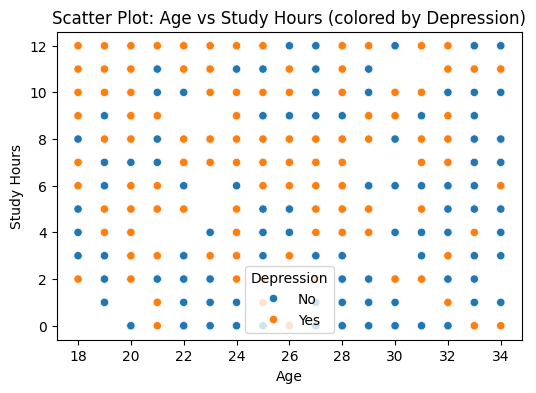

In [13]:
# Scatter plot: Age vs Study Hours
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Study Hours', hue='Depression', data=df)
plt.title('Scatter Plot: Age vs Study Hours (colored by Depression)')
plt.xlabel('Age')
plt.ylabel('Study Hours')
plt.show()

Analysis (Scatter Plot):

The scatter plot shows no strong linear relationship between age and study hours.

Students with "Depression = Yes" and "Depression = No" appear across almost all ages and study levels.

This suggests that other factors (e.g., Academic Pressure or Sleep Duration) may play a more significant role in predicting depression.

# Countplots

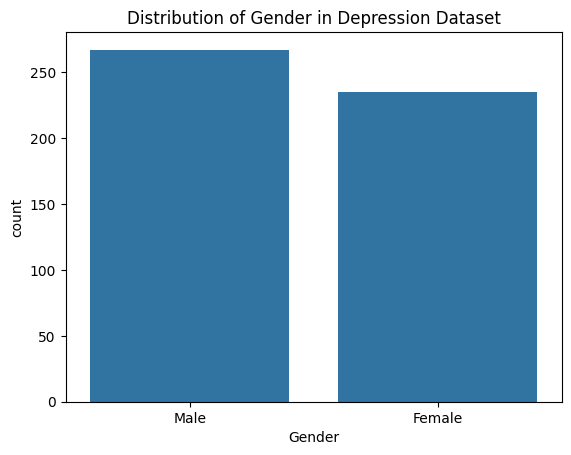

In [14]:
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender in Depression Dataset')
plt.show()

Bar Plot – Gender

The gender distribution shows 267 male students and 235 female students. The dataset is relatively balanced in terms of gender, which is beneficial for analysis.

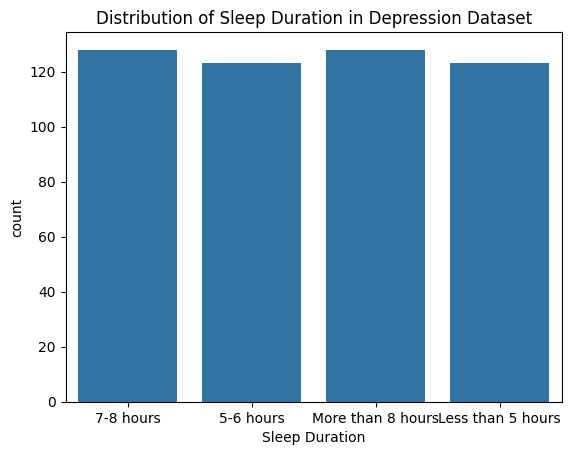

In [15]:

sns.countplot(x='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration in Depression Dataset')
plt.show()

Bar Plot – Sleep Duration The distribution of sleep duration is fairly balanced across the four categories: less than 5 hours (123), 5–6 hours (123), 7–8 hours (128), and more than 8 hours (128). This balanced distribution helps in ensuring fair comparison between categories.

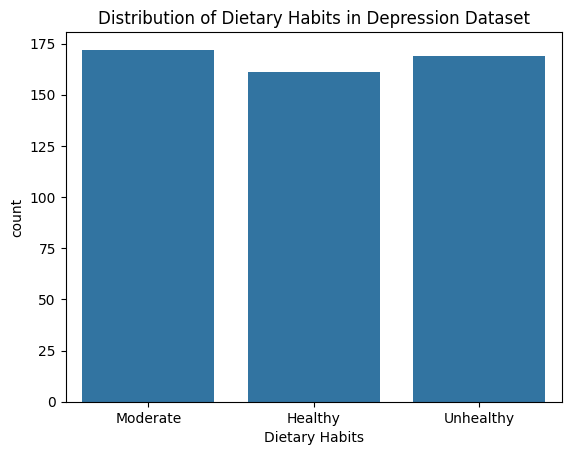

In [16]:
sns.countplot(x='Dietary Habits', data=df)
plt.title('Distribution of Dietary Habits in Depression Dataset')

plt.show()

Bar Plot – Dietary Habits The dietary habits of students are distributed among three categories: Moderate (172), Unhealthy (169), and Healthy (161). The near balance among categories indicates diverse eating habits in the dataset.

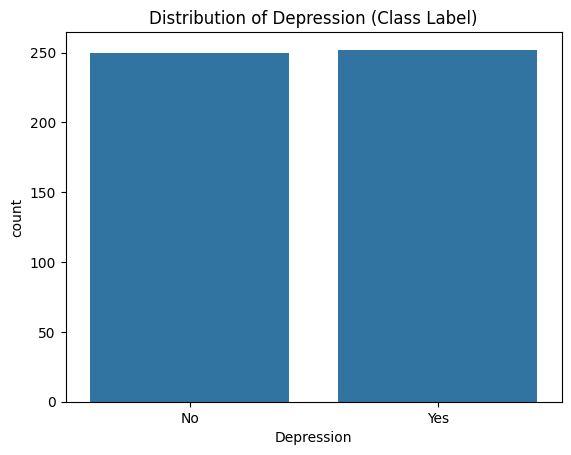

In [17]:
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression (Class Label)')
plt.show()

Bar Plot – Depression (Class Label) The class label distribution is almost perfectly balanced, with 252 students labeled “Yes” for depression and 250 labeled “No.” This balance reduces the risk of bias during classification tasks.

# [4] Data preprocessing


# Data before preprocessing

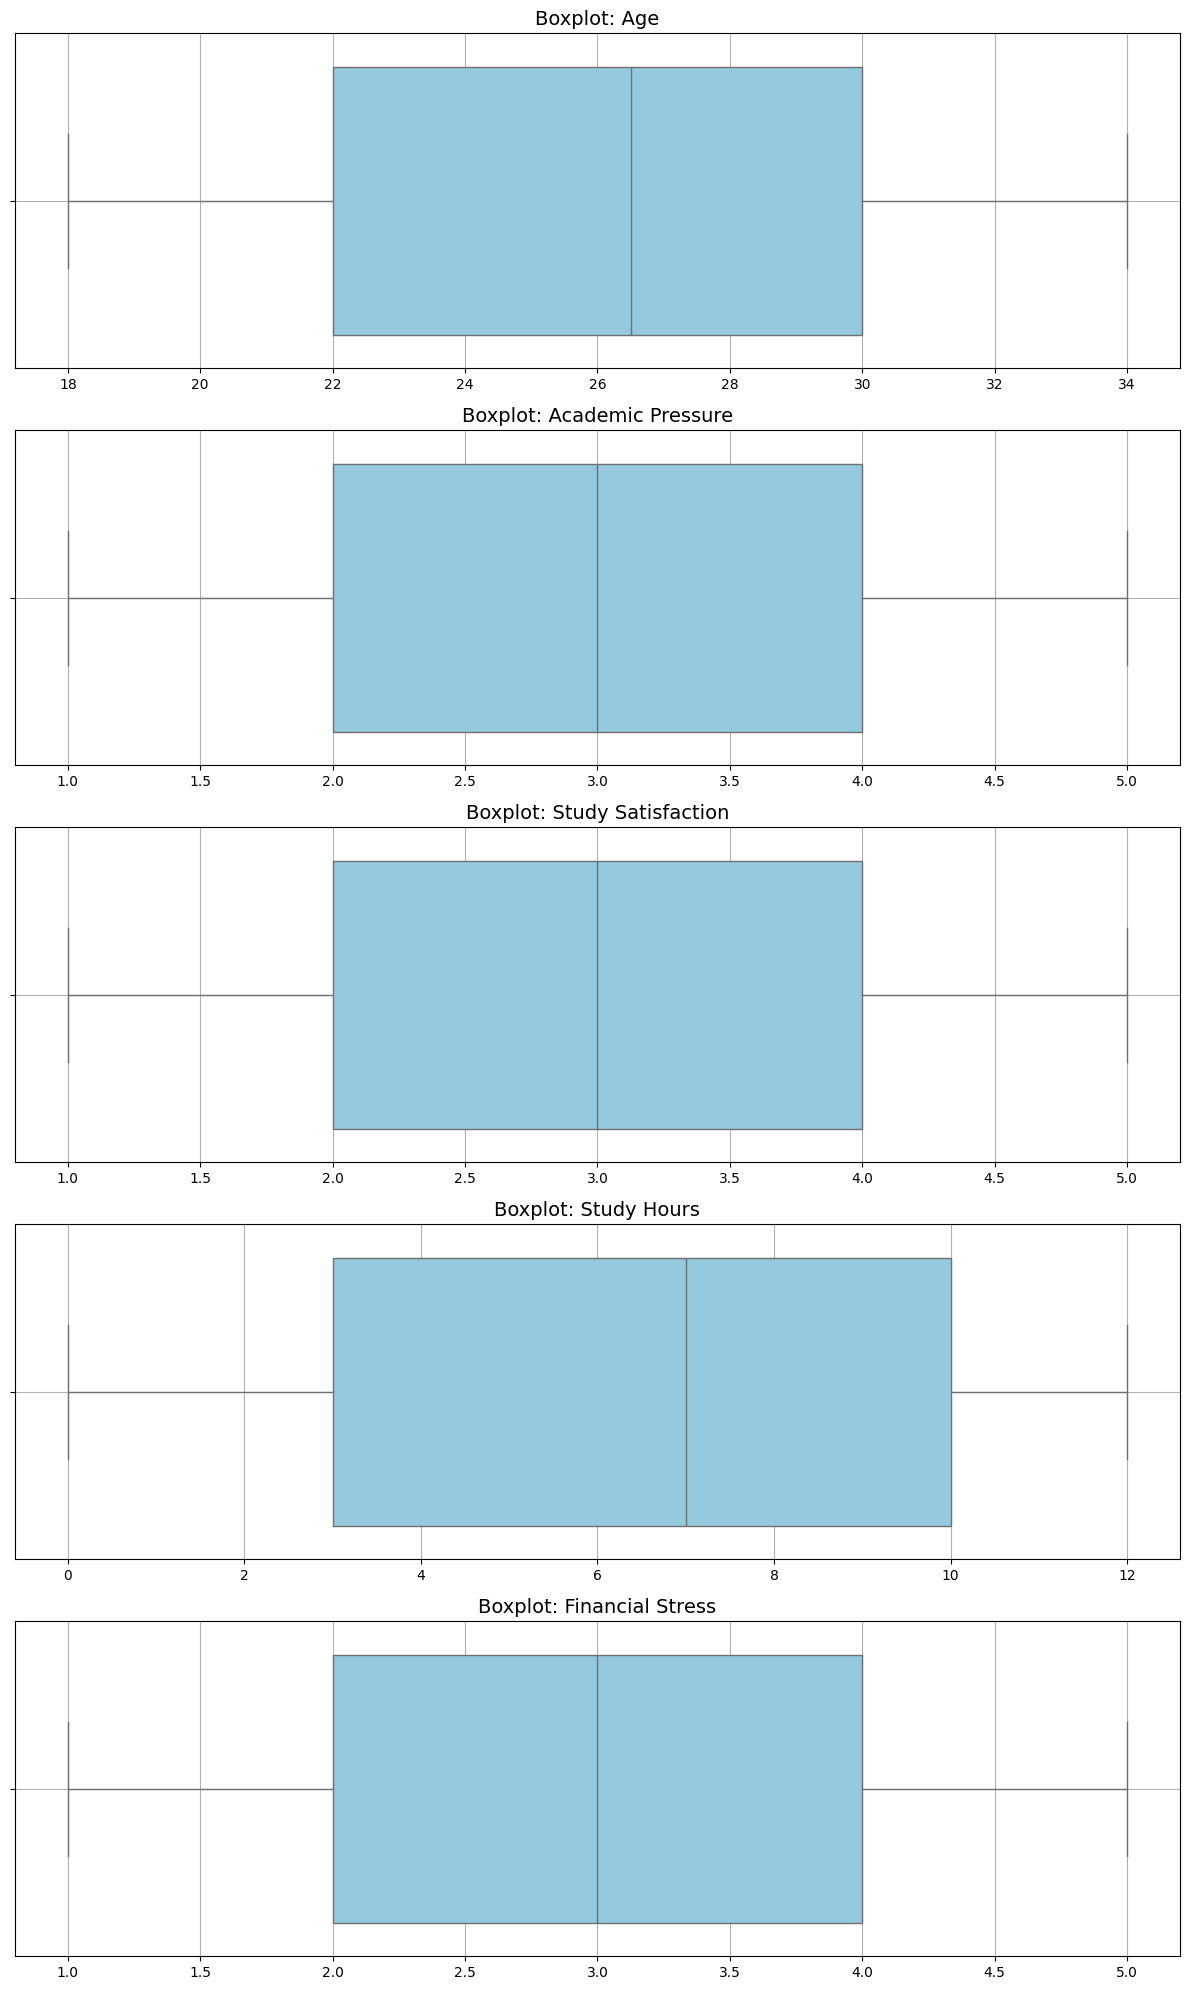

In [18]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot: {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

These boxplots show how the numerical values look before preprocessing. They help visualize how the data is spread and make it easy to spot outliers — values that are unusually high or low compared to the rest. By looking at these plots, we can understand which features might need cleaning or normalization later to make the dataset more accurate and balanced.

# Age Distribution

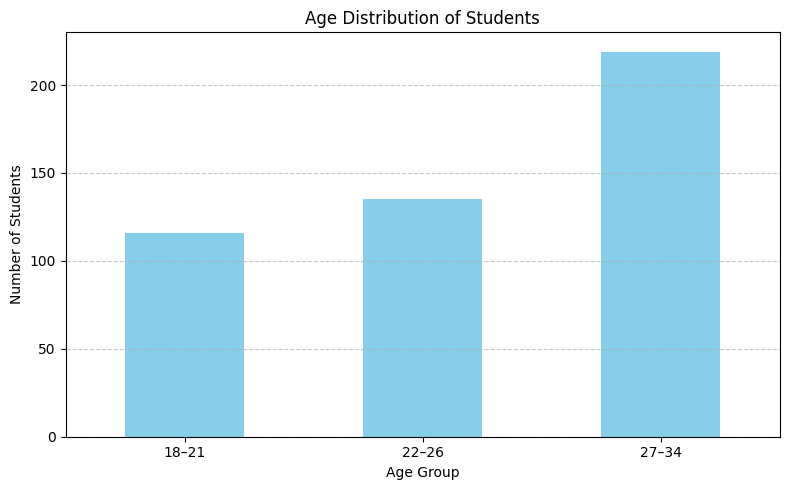

In [19]:
bins = [18, 22, 27, 34]
labels = ["18–21", "22–26", "27–34"]

age_groups = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
age_group_counts = age_groups.value_counts().sort_index()

plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title("Age Distribution of Students")
plt.xlabel("Age Group")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This bar chart shows the distribution of students across different age groups. Most students fall within the 22–26 age range, followed by 18–21, while the 27–34 group is the least represented. To simplify the analysis, the continuous “Age” variable was divided into categorical age groups. This discretization helps identify patterns between age categories and other factors such as academic pressure or depression levels more effectively.

# **Feature Selection**

We applied the Variance Threshold technique to select the most informative features in the dataset.
This method removes features with low variance, as such features do not provide meaningful information and have little impact on the analysis or clustering results.

A threshold value of 0.1 was used. After applying the selector, only the features with variance above this value were retained.
This process helped reduce noise, eliminate non-informative attributes, and improve the overall quality of the numerical representation of the dataset.

In [20]:
from sklearn.feature_selection import VarianceThreshold

numeric_df = df.select_dtypes(include='number')

selector = VarianceThreshold(threshold=0.1)
X_new = selector.fit_transform(numeric_df)

selected_features = numeric_df.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours',
       'Financial Stress'],
      dtype='object')


# **Feature Selection Conclusion**
The Variance Threshold method identified five features with sufficient variance to be considered informative:
Age, Academic Pressure, Study Satisfaction, Study Hours, and Financial Stress.

These attributes contribute meaningful variability to the dataset and therefore can support clustering and further analysis.
Low-variance features were automatically removed, helping reduce noise and improve the overall quality of the model inputs.
By keeping only the most informative features, the dataset becomes more efficient and better aligned with the objectives of the study.

#**Label Encoding**

Some columns in the dataset contain categorical values written as text, such as “Yes/No” or different lifestyle descriptions.
these textual categories need to be converted into numerical values so that the dataset becomes consistent and easier to analyze.

Label Encoding assigns a number to each category while keeping the original meaning of the data, making the dataset ready for the next transformations.

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Copy dataframe to avoid modifying the original
df_encoded = df.copy()

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("Encoded categorical columns:", list(categorical_cols))

# ---- Clean, nice display ----
print("\nEncoded columns after Label Encoding:")
display(df_encoded[categorical_cols].head(10))

Encoded categorical columns: ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

Encoded columns after Label Encoding:


,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
0,1,1,1,1,1,0
1,1,0,0,1,1,0
2,1,0,2,1,0,1
3,1,3,2,1,1,0
4,0,3,0,1,1,0
5,1,0,2,1,1,1
6,0,3,1,1,0,1
7,0,3,0,1,1,1
8,0,3,1,0,0,0
9,1,2,2,1,0,1


# **Label Encoding Result**

After applying Label Encoding, all categorical columns in the dataset were successfully converted from textual categories into numerical values. This step ensures that the dataset becomes consistent and ready for subsequent preprocessing and analytical tasks.

The columns that were encoded are:

Gender, Sleep Duration, Dietary Habits, Have you ever had suicidal thoughts?, Family History of Mental Illness, Depression

Each distinct category within these columns was replaced with an integer value (such as 0, 1, 2, or 3). These numerical representations maintain the original meaning of the categories while making the data suitable for machine-learning algorithms and normalization techniques.

* Gender has been converted to 0 and 1

* Sleep Duration and Dietary Habits have been mapped to numerical scales, suicidal thoughts, family history, and depression have been encoded into 0 and 1.

With this transformation, all categorical variables in the dataset are now fully numeric and ready for further preprocessing steps.

# Normalization

In [24]:
from sklearn.preprocessing import  MinMaxScaler
# Step 2: Min-Max Normalization

# Define numeric_cols from df_encoded as label encoding has been applied
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Normalized numeric columns:", list(numeric_cols))


# Step 3: Convert integers to float (for consistency)

# After Min-Max scaling, the scaled columns are already float64.
# This step ensures any remaining integer columns (if any were not scaled or were created later)
# are also converted to float for consistency.
int_cols = df_encoded.select_dtypes(include=['int64', 'int32']).columns
df_encoded[int_cols] = df_encoded[int_cols].astype('float64')


# Step 4: Save Preprocessed Data

df_encoded.to_csv("Preprocessed_DataSet.csv", index=False)
print("Preprocessed dataset saved successfully!")

Normalized numeric columns: ['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']
Preprocessed dataset saved successfully!


Min-Max normalization scales all numeric features into a consistent range between 0 and 1. This ensures that no feature dominates others due to larger numerical values and helps improve the performance and stability of machine learning algorithms. Converting integer columns to float maintains consistency in data types, and the final preprocessed dataset is saved for later use in the modeling phase.



# [5] Data Mining Technique

**In this study, two main data mining techniques were applied to the preprocessed dataset: classification and clustering. Each technique was implemented using appropriate Python packages within the scikit-learn ecosystem, following the requirements of the project.**

# **Classification Technique (Decision Tree Classifier)**

To perform supervised learning on the dataset, we applied the Decision Tree Classification algorithm. The goal was to predict the target variable (Depression) based on the other numerical and categorical features included in the dataset.

Why this technique?

Decision Trees are effective for interpreting feature importance, handling mixed data types, and generating readable decision rules. They are also suitable for comparing the performance of different splitting criteria such as Gini Index and Information Gain (Entropy).

How it was applied

We used the following Python packages and methods:

sklearn.model_selection.train_test_split for splitting the dataset.

sklearn.tree.DecisionTreeClassifier for training decision tree models.

sklearn.metrics.accuracy_score to evaluate prediction accuracy.

sklearn.metrics.confusion_matrix for calculating misclassification patterns.

matplotlib and seaborn for visualizing confusion matrices.

Experiment design

We evaluated the Decision Tree using:

* Three different train/test partitions: 90/10, 80/20, and 70/30.
* Two attribute selection criteria:

Gini Index (default)

Entropy (Information Gain)

For each experiment, accuracy scores and confusion matrices were computed. Finally, a comparison table was created to analyze which splitting criterion performed better on our dataset and why.

# **Clustering Technique (K-Means Clustering)**

To explore hidden patterns and group similar instances in the dataset, we applied unsupervised learning using the K-Means algorithm.

Why this technique?

K-Means is widely used for clustering numeric datasets. It efficiently groups observations with similar characteristics and works well with standardized data.

How it was applied

**The following Python tools were used:**

sklearn.cluster.KMeans to perform clustering with different K values.

sklearn.metrics.silhouette_score to measure cluster separation quality.

KMeans.inertia_ to compute the total within-cluster sum of squares (Elbow Method).

matplotlib.pyplot and seaborn for visualizing cluster assignments, silhouette plots, and elbow curves.

Experiment design

We tested the algorithm with at least three cluster sizes: K = 2, 3, and 4.

For each K value, the following were computed:

* Inertia (for the Elbow Method)
* Average Silhouette Score
* Visual Cluster Plots
* Silhouette Visualization

Cluster Quality Evaluation

Based on the evaluation metrics:

K = 3: The highest silhouette score among all tested K values. Clusters have clear boundaries and good internal structure.

The elbow curve also showed diminishing returns after K = 3.

Therefore, K = 3 was selected as the optimal number of clusters, and the final clustering results were saved for further analysis.

**Final Summary:** Both techniques were applied systematically using appropriate Python libraries. The Decision Tree model allowed supervised prediction of depression levels under different splitting criteria and data partitions. Meanwhile, K-Means clustering revealed meaningful structure in the dataset, with K = 3 providing the best performance according to the silhouette score and elbow evaluation.

# [6] Evaluation and Comparison

#**Data Loading**
Load the Preprocessed Data and the necessary libraries.



In [25]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv("Preprocessed_DataSet.csv")
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    float64
 1   Age                                    502 non-null    float64
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    float64
 5   Dietary Habits                         502 non-null    float64
 6   Have you ever had suicidal thoughts ?  502 non-null    float64
 7   Study Hours                            502 non-null    float64
 8   Financial Stress                       502 non-null    float64
 9   Family History of Mental Illness       502 non-null    float64
 10  Depression                             502 non-null    float64
dtypes: flo

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,0.6250,0.25,0.75,0.333333,0.5,1.0,0.750000,0.25,1.0,0.0
1,1.0,0.6250,0.75,1.00,0.000000,0.0,1.0,0.583333,0.00,1.0,0.0
2,1.0,0.4375,0.00,0.50,0.000000,1.0,1.0,0.833333,0.75,0.0,1.0
3,1.0,0.3125,0.00,0.75,1.000000,1.0,1.0,0.583333,0.25,1.0,0.0
4,0.0,0.8125,0.00,1.00,1.000000,0.0,1.0,0.333333,0.25,1.0,0.0


#**Define the dependent and independent variables**

In [26]:
#Separate Features and Target

# Ensure to use the encoded DataFrame (df_encoded) for classification
X = df_encoded.drop("Depression", axis=1)
y = df_encoded["Depression"]

*   The independent variables (X) represent all the input attributes used by the model to learn patterns. These include factors such as academic pressure, sleep duration, study satisfaction, and other mental-health-related measurements.
*   The dependent variable (y) is the outcome we want to predict — in this case, the Depression status of each student (0 = Not depressed, 1 = Depressed).

#**Training and Evaluating Decision Tree (Gini) Across Different Train-Test Splits**

In [27]:
# Define train/test splits
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
results = []

for train_ratio, test_ratio in splits:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )

     # Train Decision Tree (Gini)
    model = DecisionTreeClassifier(criterion="gini", random_state=45)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Accuracy
    acc = model.score(X_test, y_test)

     # Save results
    results.append([f"{int(train_ratio*100)}/{int(test_ratio*100)}", acc])

    # Create results table
    results_df = pd.DataFrame(results, columns=["Train/Test Split", "Accuracy"])
results_df

,Train/Test Split,Accuracy
0,90/10,0.843137
1,80/20,0.900990
2,70/30,0.847682


we train a Decision Tree classifier using the Gini impurity measure on three different train-test partitions: 90/10, 80/20, and 70/30. For each split, the model is trained on the training data and then evaluated on the unseen test data to measure its generalization performance. The accuracy for each partition is recorded in a results table

#**Visualize confusion matrices**

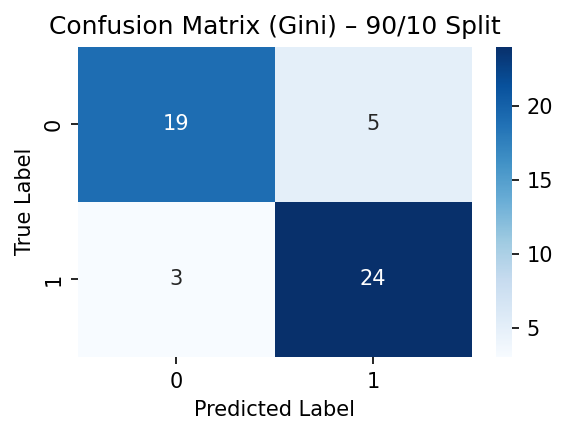

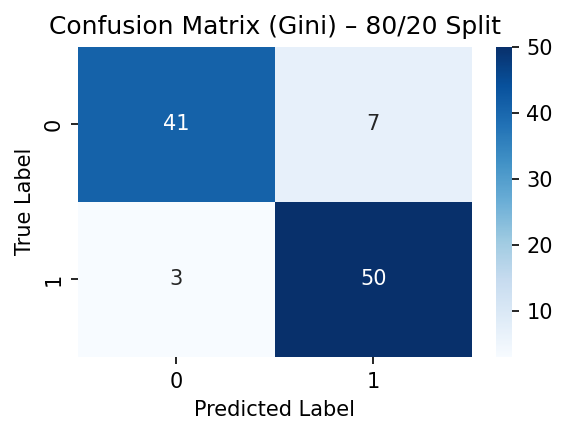

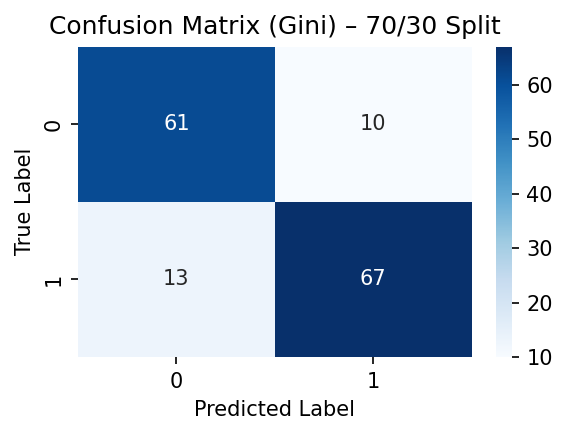

In [32]:
for train_ratio, test_ratio in splits:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )

    model_gini = DecisionTreeClassifier(
        criterion="gini",
        random_state=45
    )
    model_gini.fit(X_train, y_train)

    y_pred_gini = model_gini.predict(X_test)

    cm = confusion_matrix(y_test, y_pred_gini)

    plt.figure(figsize=(4, 3), dpi=150)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (Gini) – {int(train_ratio*100)}/{int(test_ratio*100)} Split")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()



#**Gini Decision Tree**

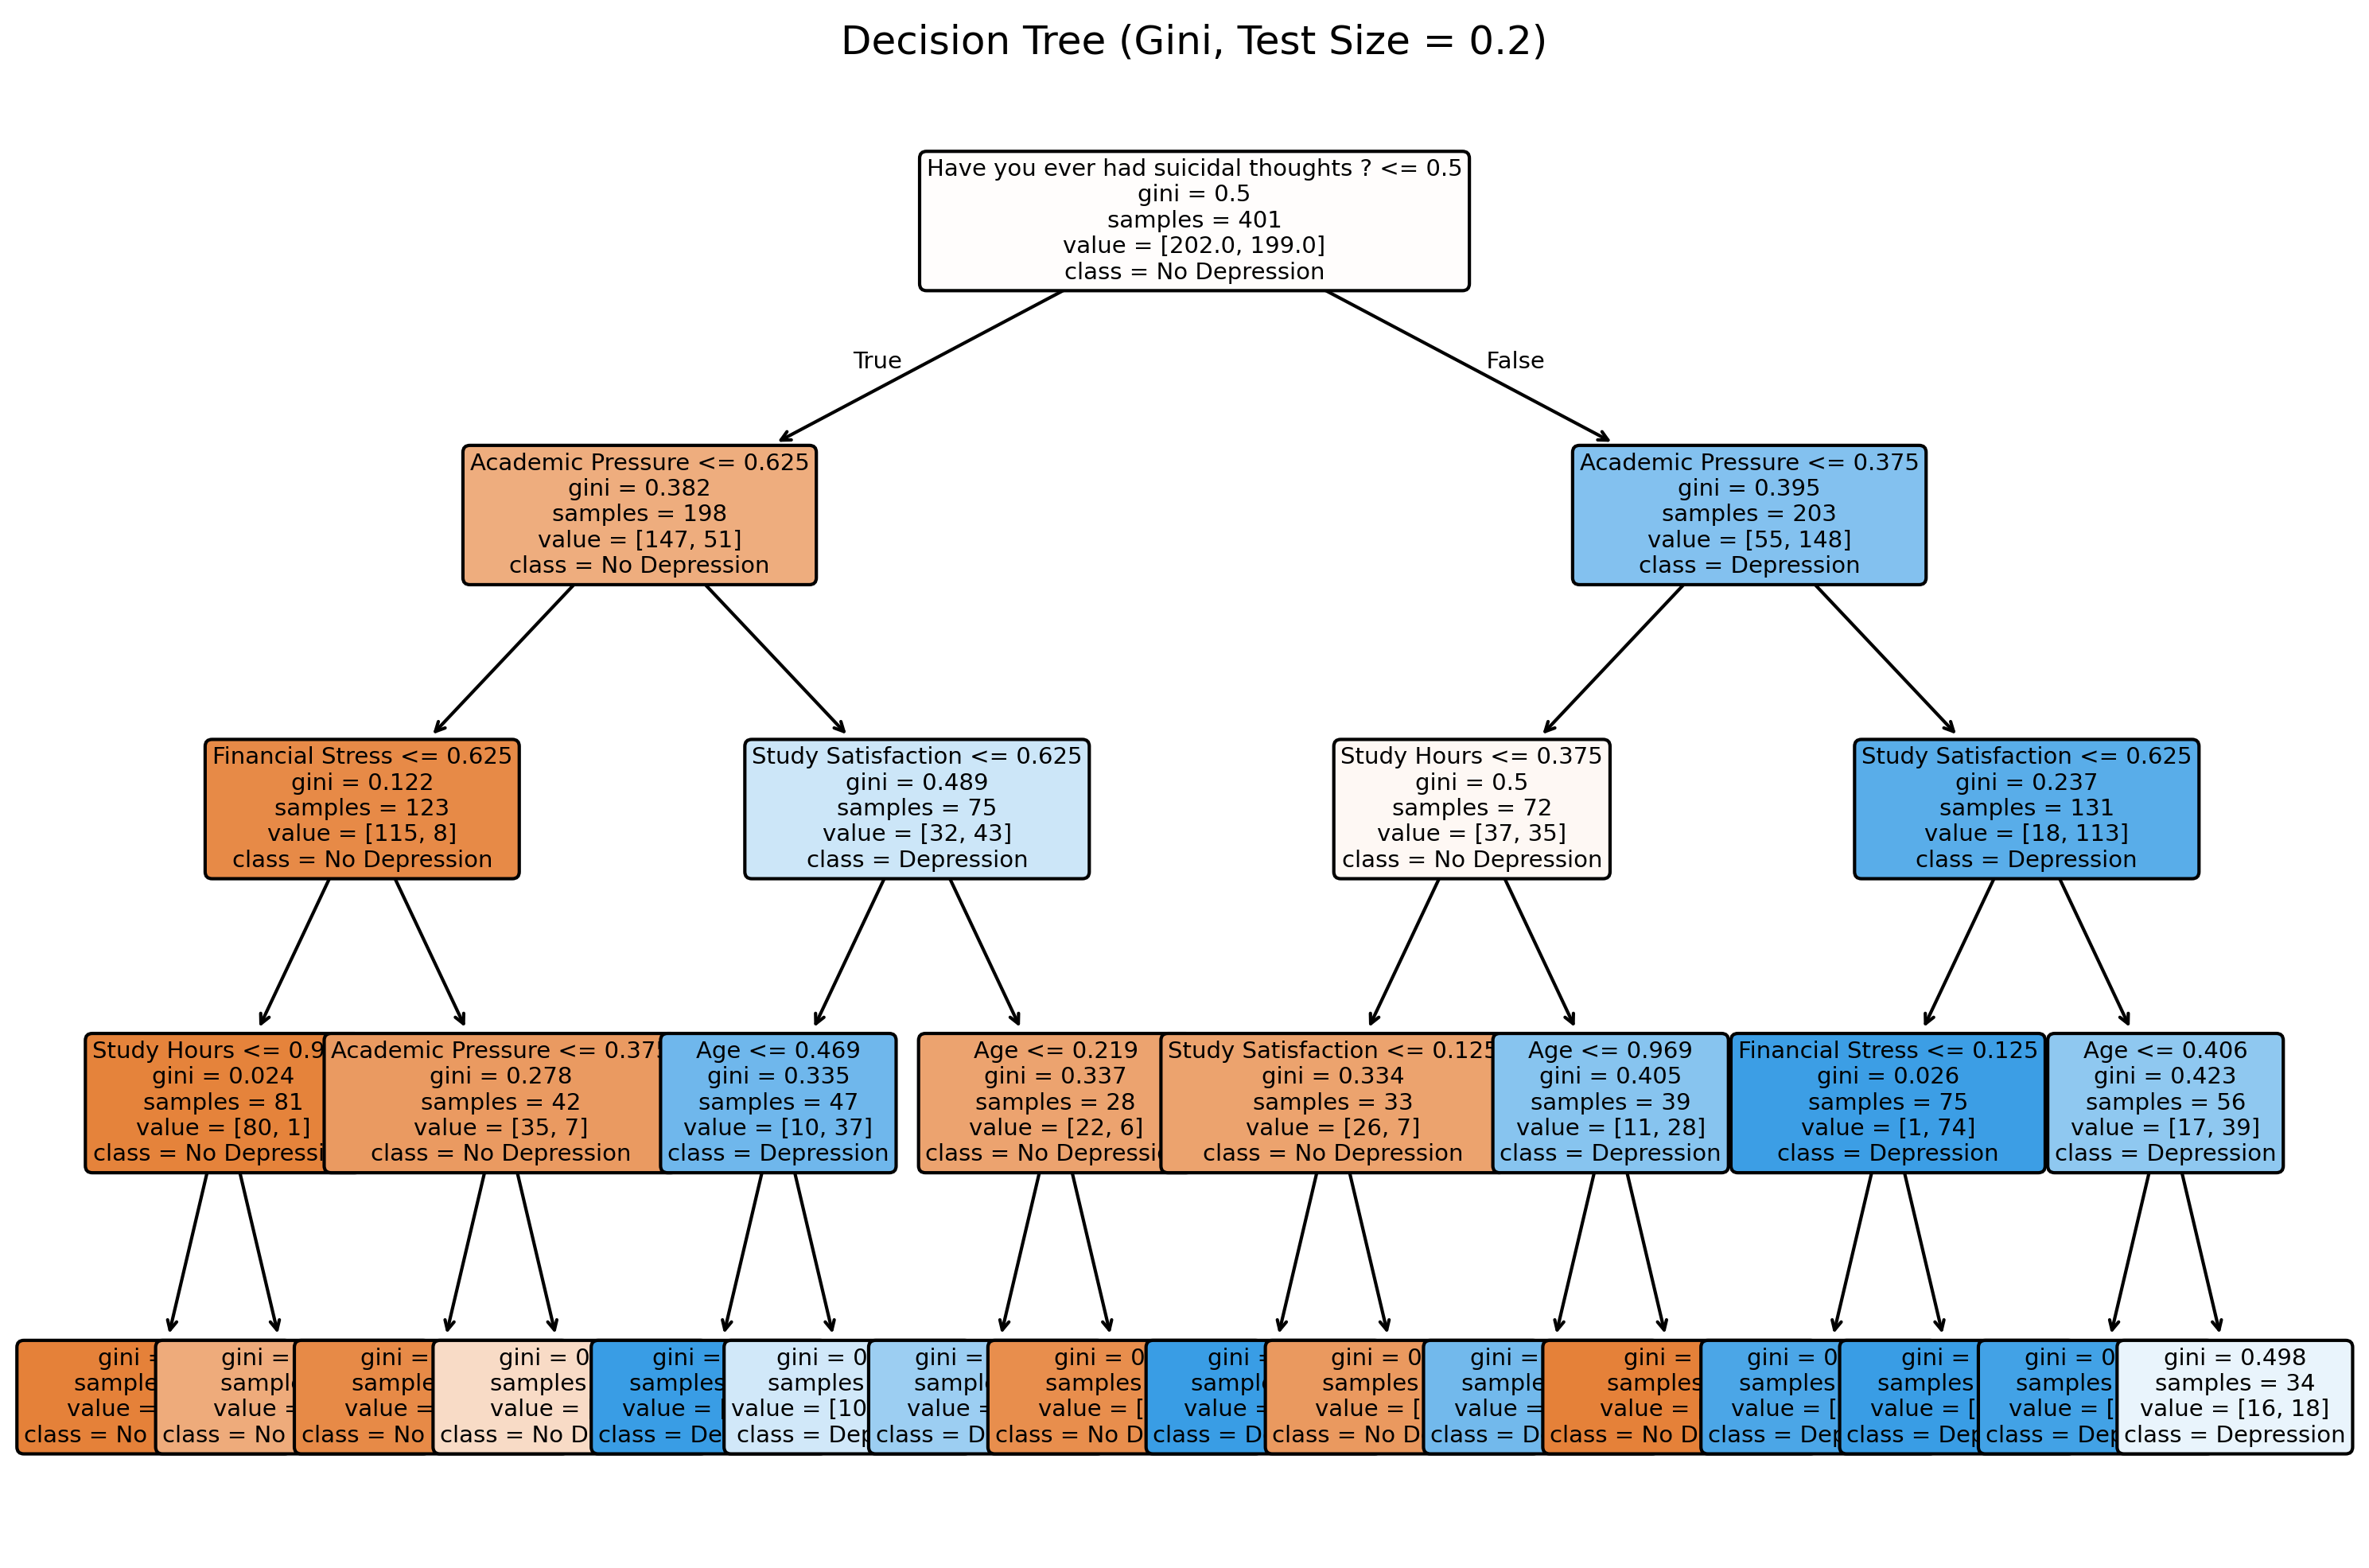

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


clf_gini = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)

clf_gini.fit(X_train, y_train)

plt.figure(figsize=(12, 8), dpi=300)
plot_tree(
    clf_gini,
    feature_names=X.columns,
    class_names=["No Depression", "Depression"],
    filled=True,
    fontsize=7,
    rounded=True
)

plt.title("Decision Tree (Gini, Test Size = 0.2)")
plt.show()

The tree shows that the strongest predictor of depression is whether the student has had suicidal thoughts, which appears at the root. From there, the model uses factors like academic pressure, study satisfaction, financial stress, study hours, and age to separate depressed from non-depressed students. Overall, the left side of the tree mostly leads to “No Depression,” while the right side—driven by higher academic pressure and lower study satisfaction—leads to “Depression.” This indicates that mental health indicators and academic stress are the most influential features in the dataset.

The confusion matrices across the three splits show a consistently high number of correct predictions, with only a few misclassifications. This indicates that the Decision Tree model performs reliably and generalizes well across different training sizes.

In [30]:
entropy_results = []

for train_ratio, test_ratio in splits:


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )

    # Initialize and train Decision Tree (Entropy) model
    model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=45)
    model_entropy.fit(X_train, y_train)

    # Predict & Calculate Accuracy
    y_pred_entropy = model_entropy.predict(X_test)
    acc_entropy = model_entropy.score(X_test, y_test)

    # Store results
    entropy_results.append([f"{int(train_ratio*100)}/{int(test_ratio*100)}", acc_entropy])

# Create accuracy table
entropy_results_df = pd.DataFrame(entropy_results, columns=["Train/Test Split", "Accuracy"])
entropy_results_df

,Train/Test Split,Accuracy
0,90/10,0.862745
1,80/20,0.910891
2,70/30,0.841060


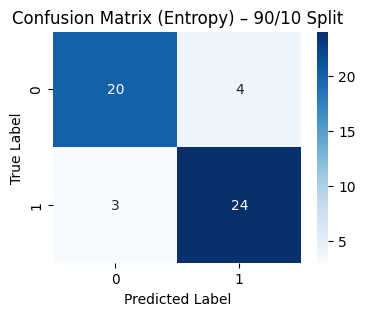

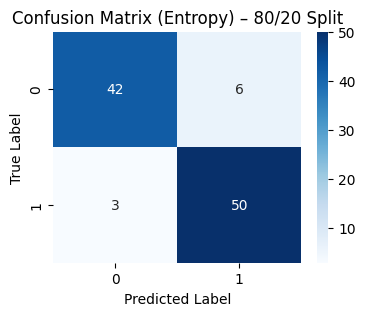

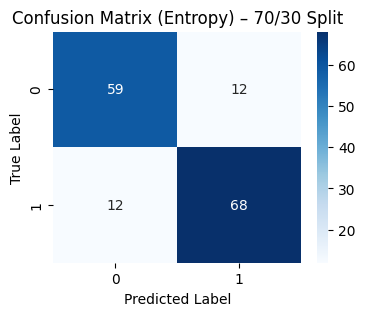

In [31]:
for train_ratio, test_ratio in splits:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )

    model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=45)
    model_entropy.fit(X_train, y_train)

    y_pred_entropy = model_entropy.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_entropy)

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (Entropy) – {int(train_ratio*100)}/{int(test_ratio*100)} Split")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


The confusion matrices for the three splits (90/10, 80/20, and 70/30) show consistent performance of the entropy-based Decision Tree classifier. In all cases, correctly classified instances are higher than misclassified ones, and the accuracy remains similar across the different train-test ratios. This indicates that the model generalizes well and maintains stable performance regardless of the split size


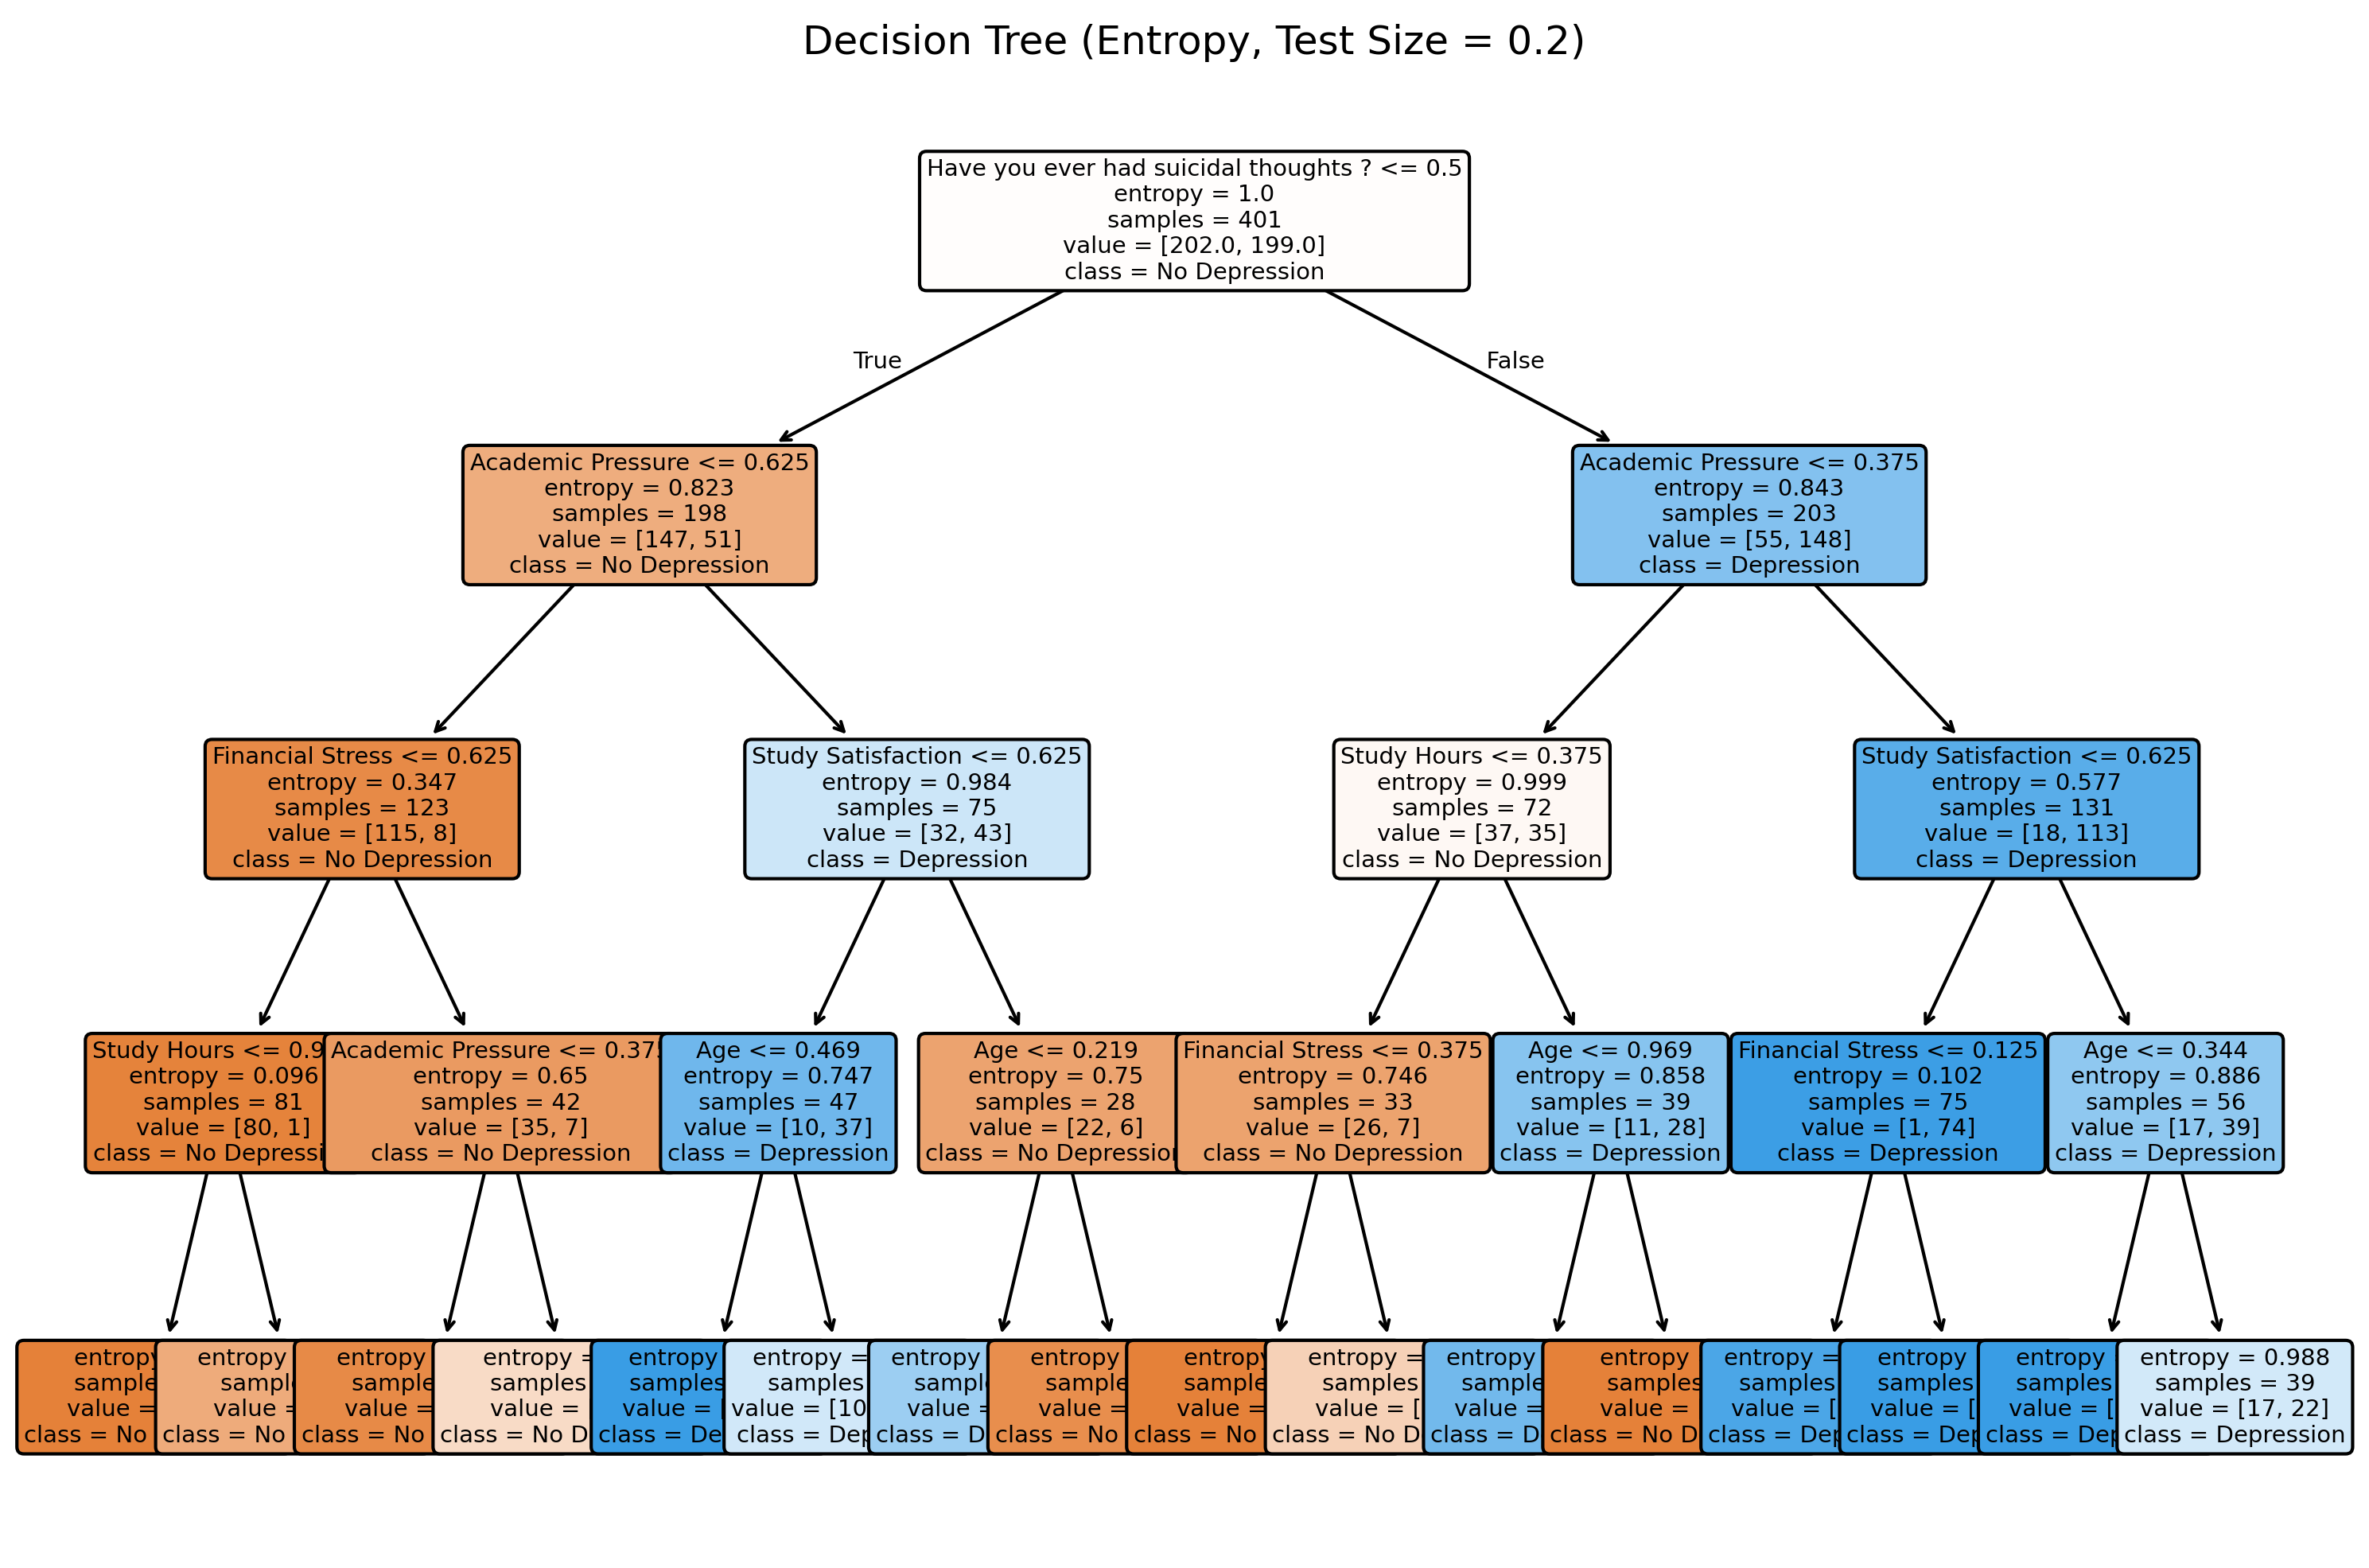

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8), dpi=300)
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No Depression", "Depression"],
    filled=True,
    fontsize=7,
    rounded=True
)
plt.title("Decision Tree (Entropy, Test Size = 0.2)")
plt.show()

The decision tree generated using the Entropy criterion shows how the model splits the data based on the most informative features. The root node represents the attribute with the highest information gain, and the following branches apply additional rules that further separate the data. Overall, the entropy-based tree is simple, interpretable, and highlights the key features that contribute most to predicting depression

In [34]:
comparison_df = pd.DataFrame({
    "Train/Test Split": results_df["Train/Test Split"],
    "Gini Accuracy": results_df["Accuracy"],
    "Entropy Accuracy": entropy_results_df["Accuracy"],
})

comparison_df

,Train/Test Split,Gini Accuracy,Entropy Accuracy
0,90/10,0.843137,0.862745
1,80/20,0.900990,0.910891
2,70/30,0.847682,0.841060


#**Final Analysis: Gini vs Entropy**

After applying both Gini and Entropy criteria to the Decision Tree classifier across the same train/test splits (90/10, 80/20, 70/30), the results show:

*   Both criteria produce very similar accuracy values, with only slight differences.

*   Gini is known to be computationally faster because it avoids logarithmic operations.


*  Entropy can sometimes provide better splits when classes are highly informative,
but in our dataset the difference is minimal.

#**Conclusion:**

Both criteria perform almost equally well on this dataset.
However, because of its efficiency and nearly identical accuracy,
Gini can be considered the slightly better choice, while Entropy remains a strong alternative.

# **K-Means Clustering and Visualization**

**Data Preparation for K-Means**

In clustering tasks, we don't include the target/label column.
 K-Means is an unsupervised learning algorithm, meaning it discovers natural groupings in the data without using the true output labels. Therefore, the 'Depression' column must be removed because: It is the TRUE label (0/1), and including it will make clustering meaningless since Our goal is to group students based on similarities in lifestyle, academic pressure, stress, etc., not based on the answer we already know.

After dropping 'Depression', we scale the remaining features using StandardScaler
to ensure that all attributes contribute equally to the distance calculations.

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# The 'Depression' column should be dropped for clustering as it's the target label
features = df_encoded.drop("Depression", axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

print("\nScaled DataFrame:")
print(scaled_df.head())


Scaled DataFrame:
     Gender       Age  Academic Pressure  Study Satisfaction  Sleep Duration  \
0  0.938163  0.359587          -0.723007            0.673631       -0.456140   
1  0.938163  0.359587           0.717269            1.402429       -1.350603   
2  0.938163 -0.253706          -1.443146           -0.055168       -1.350603   
3  0.938163 -0.662569          -1.443146            0.673631        1.332785   
4 -1.065913  0.972881          -1.443146            1.402429        1.332785   

   Dietary Habits  Have you ever had suicidal thoughts ?  Study Hours  \
0       -0.019659                               0.964764     0.694256   
1       -1.253272                               0.964764     0.159311   
2        1.213953                               0.964764     0.961728   
3        1.213953                               0.964764     0.159311   
4       -1.253272                               0.964764    -0.643106   

   Financial Stress  Family History of Mental Illness  
0    

# **Elbow Method**
In this step, we applied the Elbow Method to determine which K values are worth testing in K-Means. The idea is to observe how the Within-Cluster Sum of Squares (WSS) decreases as the number of clusters increases.

When plotting the WSS curve, we noticed a sharp decrease from K = 1 to K = 3, which indicates that the clustering quality improves significantly in this range. After K = 3, the curve begins to flatten, meaning that increasing the number of clusters provides only minor improvement in reducing WSS.

Based on this behavior, the Elbow Method suggests that K = 3 lies near the “elbow point.” However, to fully evaluate the best number of clusters, we selected three candidate K values: 2, 3, and 4 for further comparison. These values allow us to explore how the clustering structure changes around the elbow point.

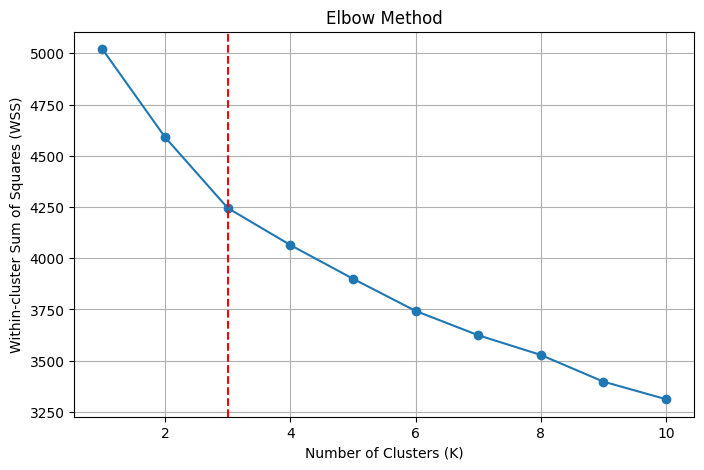

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-cluster Sum of Squares (WSS)")
plt.title("Elbow Method")
plt.axvline(x=3, linestyle='--', color='red', label='Chosen K=3')
plt.legend
plt.grid(True)
plt.show()


# **Apply K-Means for the chosen K values (2, 3, 4)**

In [37]:
import numpy as np
from sklearn.cluster import KMeans

K_values = [2, 3, 4]

for k in K_values:
    print(f"\n==============================")
    print(f" Running K-Means with K = {k}")
    print(f"==============================")

    # Create and fit the model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)

    # Print cluster centers
    print("\nCluster Centers:")
    print(kmeans.cluster_centers_)

    # Print cluster labels for all students
    print("\nCluster Labels:")
    print(kmeans.labels_)



 Running K-Means with K = 2

Cluster Centers:
[[-0.18445211 -0.13070843  0.0628697   0.04160192 -0.73821155 -0.37796988
  -0.00681531  0.37129138  0.0824344   0.19300681]
 [ 0.17031784  0.12069246 -0.0580521  -0.03841403  0.68164362  0.34900667
   0.00629307 -0.34283994 -0.07611759 -0.17821702]]

Cluster Labels:
[0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1

# **Interpretation of the K-Means Results**
The results include two main components:

1. Cluster Centers

Each cluster center represents the average standardized values for students in that group:

Positive values indicate above-average performance in that feature.

Negative values indicate below-average performance.

As K increases, the clusters become more detailed and capture more specific patterns in the data.

2. Cluster Labels

The labels show the group assigned to each student:

K = 2: two broad groups.

K = 3: more refined separation.

K = 4: smaller and more specific clusters.

Comparing labels across K values shows how the structure of the data changes when the number of clusters increases.

# **Clustering center visualization**

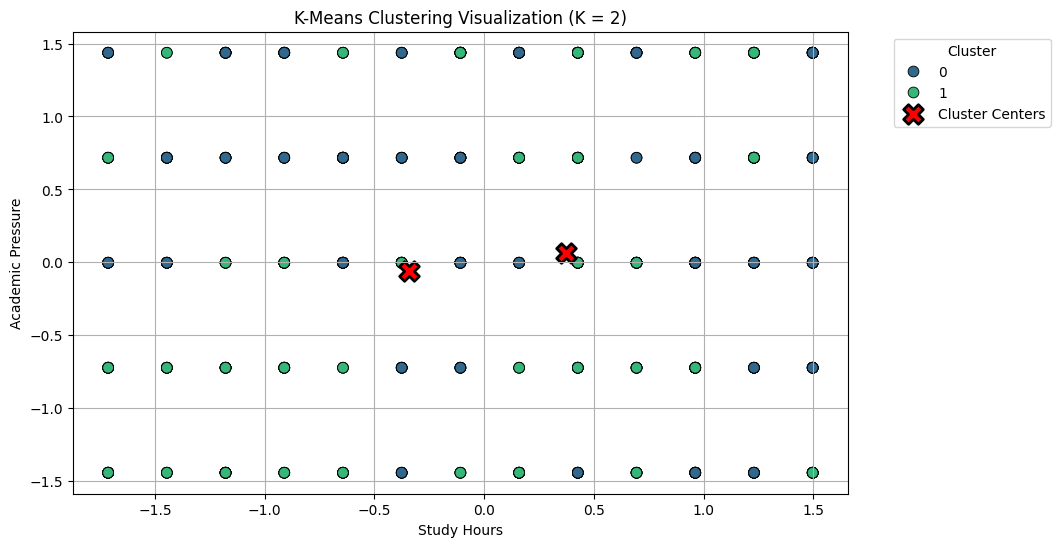

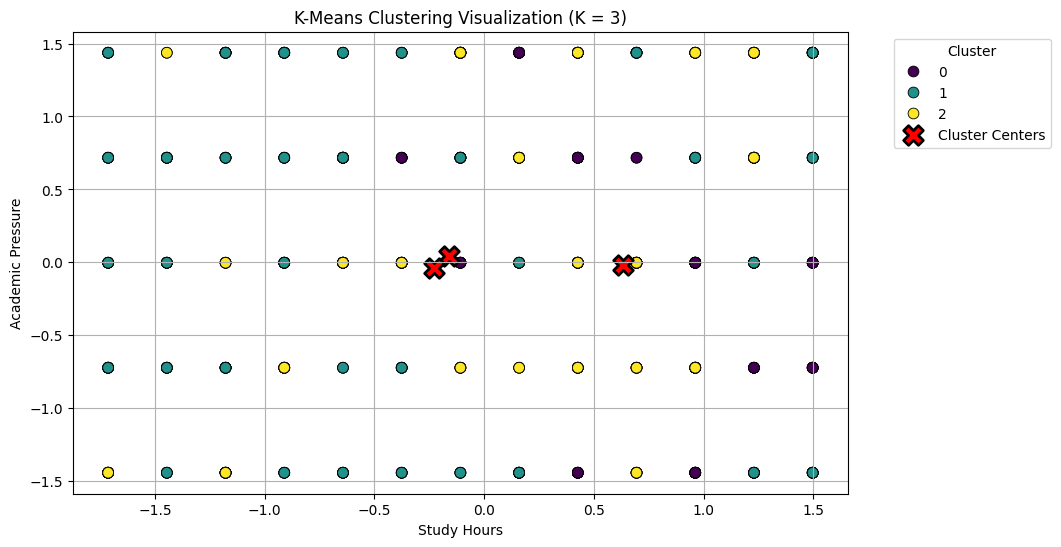

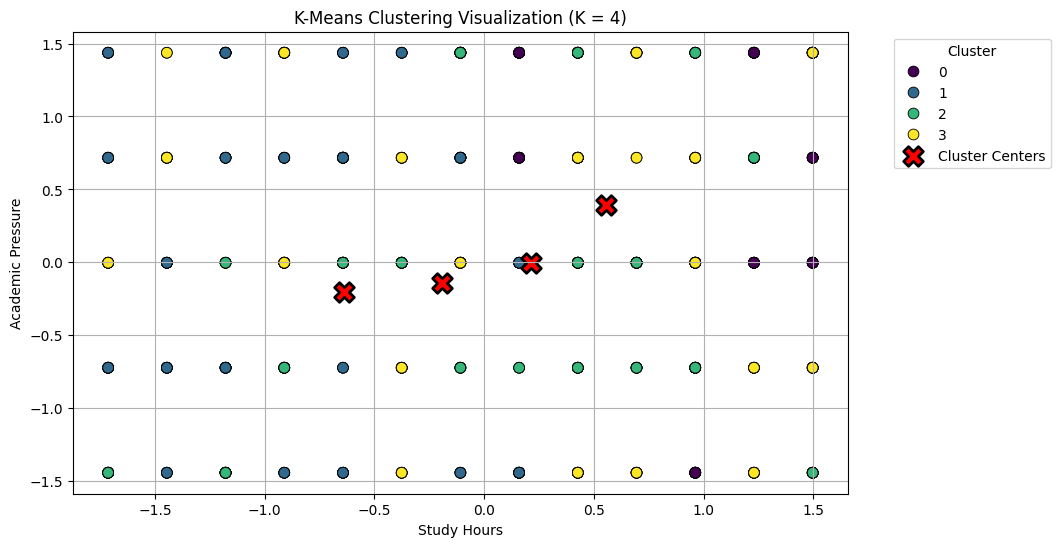

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

x_col = "Study Hours"
y_col = "Academic Pressure"

x_index = scaled_df.columns.get_loc(x_col)
y_index = scaled_df.columns.get_loc(y_col)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)

    x_vals = scaled_df.iloc[:, x_index]
    y_vals = scaled_df.iloc[:, y_index]

    plt.figure(figsize=(10, 6))

    sns.scatterplot(
        x=x_vals,
        y=y_vals,
        hue=labels,
        palette="viridis",
        s=60,
        edgecolor="black"
    )

    centers = kmeans.cluster_centers_

    plt.scatter(
        centers[:, x_index],
        centers[:, y_index],
        c='red',
        s=200,
        marker='X',
        edgecolor='black',
        linewidth=2,
        label='Cluster Centers'
    )

    plt.title(f"K-Means Clustering Visualization (K = {k})")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(
    title="Cluster",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
    plt.grid(True)
    plt.show()


# **Silhouette coefficien**

We calculate the Silhouette coefficient for K = 2, 3, and 4 to evaluate how well the clusters are separated and structured.
Higher Silhouette values indicate better-defined clusters.
This step helps us compare the quality of clustering across the chosen K values and decide which K fits the data best.

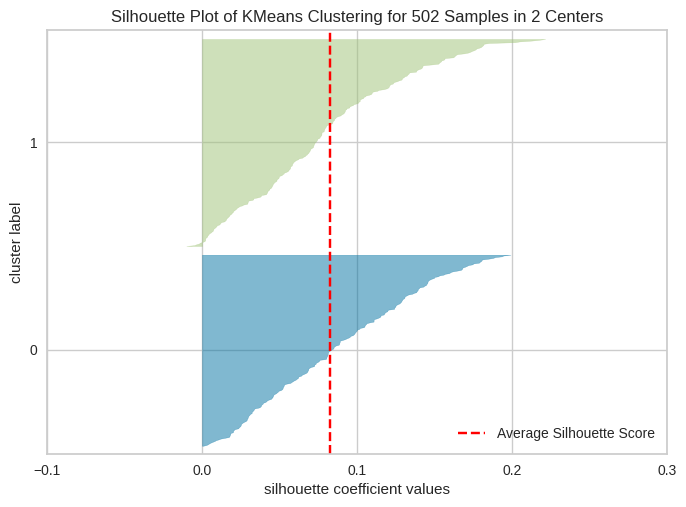

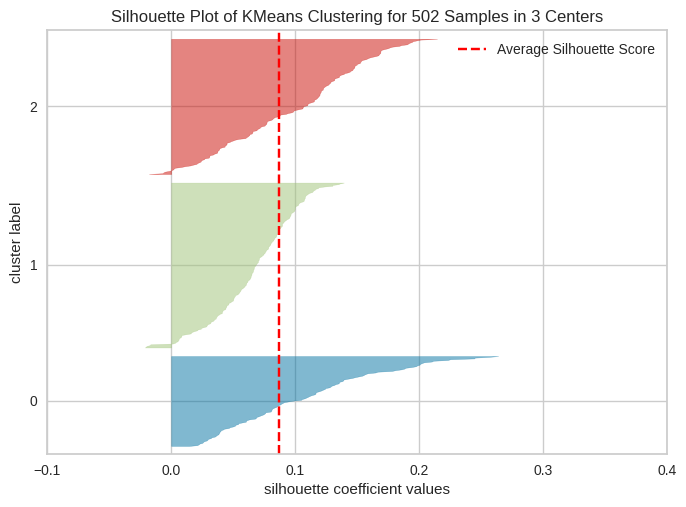

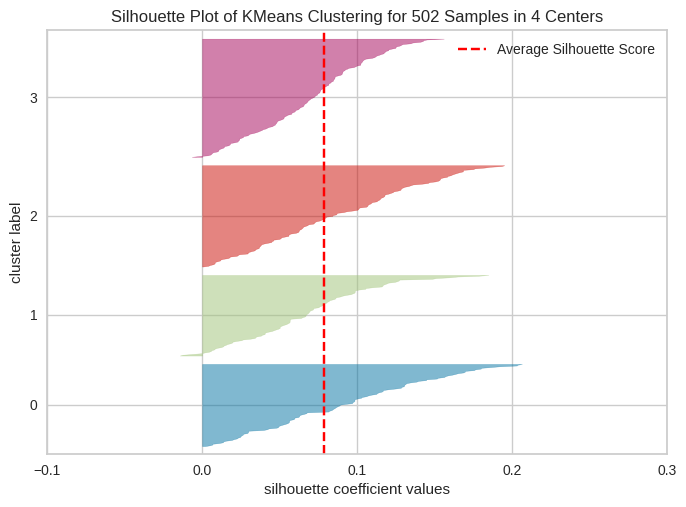

In [39]:
!pip install yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer

for k in [2, 3, 4]:
    model = KMeans(n_clusters=k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
    visualizer.fit(scaled_df)
    visualizer.show()

# **Elbow vs Silhouette Comparison**

**Elbow Method**

The Elbow curve shows how the WCSS decreases as K increases.
From K = 1 to K = 3, the drop in WCSS is large, meaning the model is improving significantly.
However, after K = 3, the curve begins to flatten, indicating diminishing returns.
This suggests that adding more clusters does not significantly improve compactness.

Therefore, K = 3 is the point where the improvement slows down, making it the most efficient choice.

**Silhouette Coeffiicien**

The Silhouette coefficient measures how well-separated and cohesive the clusters are.

K = 2: Clusters are too broad and overlap more, resulting in a lower score.

K = 3: The highest silhouette score among all tested K values. Clusters have clear boundaries and good internal structure.

K = 4: Adding a fourth cluster splits the data unnecessarily, reducing the average silhouette score and creating thinner, less stable groups.

Therefore, K = 3 produces the best cluster quality and separation.

/tmp/ipython-input-1540094612.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


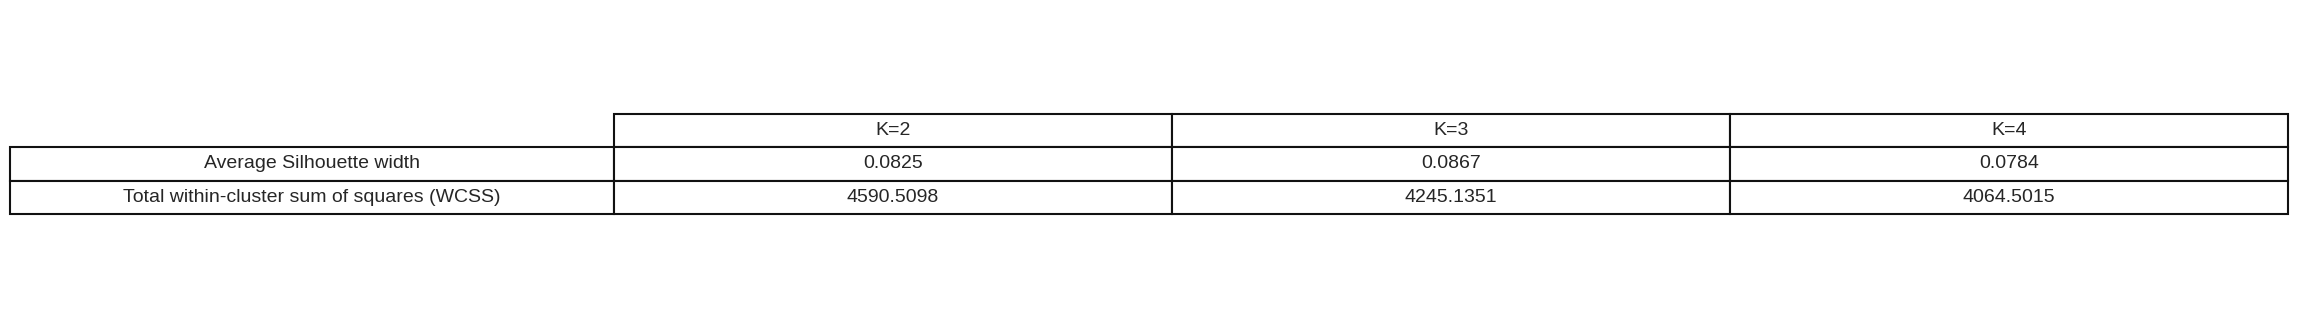

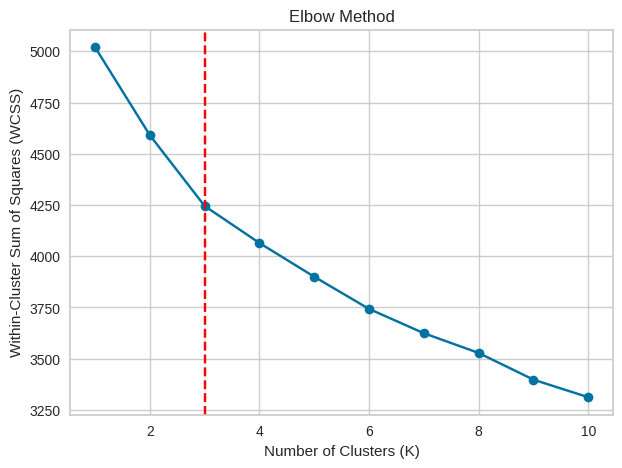

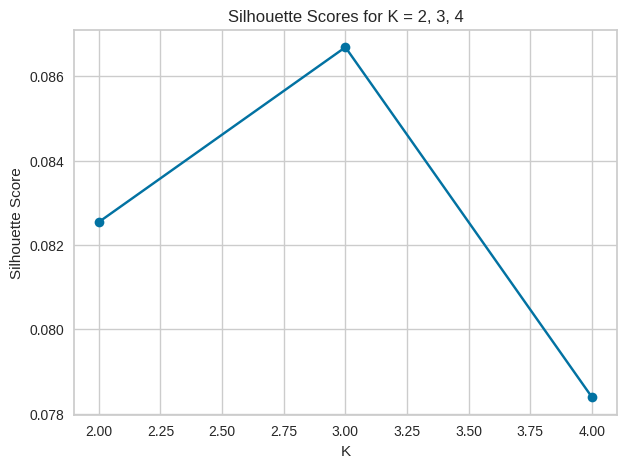

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Values of K
k_values = [2, 3, 4]

silhouette_scores = []
wcss_values = []

# Compute values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)

    # Compute silhouette
    sil_score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(round(sil_score, 4))

    # Compute WCSS
    wcss = kmeans.inertia_
    wcss_values.append(round(wcss, 4))


# ---- Table Data ----
rows = ["Average Silhouette width", "Total within-cluster sum of squares (WCSS)"]
cols = [f"K={k}" for k in k_values]
data = [
    silhouette_scores,
    wcss_values
]

# ---- Draw as Figure ----
fig, ax = plt.subplots(figsize=(12, 4))

ax.axis('off')

table = ax.table(
    cellText=data,
    rowLabels=rows,
    colLabels=cols,
    cellLoc='center',
    loc='center'
)

for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center')

table.auto_set_font_size(False)
table.set_fontsize(14)

table.scale(1.8, 2)

# Borders + padding
for key, cell in table.get_celld().items():
    cell.set_linewidth(1.5)
    cell.PAD = 0.3

plt.tight_layout()
plt.show()

#  Elbow plot
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.axvline(x=3, color='red', linestyle='--')  # highlight K=3
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

#  Silhouette plot
silhouette_scores = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, labels))

plt.figure(figsize=(7,5))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K = 2, 3, 4")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


# **Final Conclusion**

Based on the results from the Elbow Method and Silhouette Score, K = 3 is identified as the optimal number of clusters. It provides the best balance between compactness and separation, achieves the highest silhouette score, and represents the elbow point where further increasing the number of clusters yields minimal improvement. Therefore, K = 3 offers the most meaningful and stable clustering structure for this dataset.

# [7] Findings and Discussion

# [8] References